In [1]:
import os, sys
from Bio import SeqIO
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import json

In [ ]:
# Located on the misl-a server
data = "/ssd1/home/kz9/mRNA_display/out.extendedFrags.fastq"

In [ ]:
records = list(SeqIO.parse(data, "fastq"))

In [ ]:
print(str(len(records)))

In [ ]:
sequences = [r.seq for r in records]

In [ ]:
print(str(sequences[0]))
print(str(len(sequences)))

In [ ]:
dna_prod_original_sequence = "ACTTTAAGAAGGAGATATACATATGNNNNNNNNNNNNNNNNNNNNNTAACTGAACTATTTTTTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTTTTTGCATGTGTACGATTTCTGATGC"
test_seq = sequences[0]

mrna_seq = test_seq[25:46]
aptamer_seq = test_seq[63:103]

In [ ]:
fixed_len_sequences = []
for s in sequences:
    if len(s) == 130:
        fixed_len_sequences.append(s)

In [ ]:
print("Length of fixed length sequences: ", len(fixed_len_sequences))

In [ ]:
print("Sequences that are not fixed length: ", len(sequences) - len(fixed_len_sequences))

In [ ]:
aptamers = [s[63:103] for s in fixed_len_sequences]

In [ ]:
# Write the aptamers to a text file
aptamers_string = ""
for apt in aptamers:
    aptamers_string += str(apt)
    aptamers_string += "\n"
with open('raw_aptamers.txt', 'w') as f:
    f.write(aptamers_string)

## Kmeans clustering

### This runs into a memory error on misl-a. I can do it with smaller subsections of the data though. 

In [ ]:
# Change everything into array elements
indexed_sequences = np.zeros((len(shortened_sequences), len(shortened_sequences)))
for i in range(len(shortened_sequences)):
    for j in range(len(shortened_sequences[i])):
        if shortened_sequences[i][j] == 'T':
            indexed_sequences[i][j] = 1
        elif shortened_sequences[i][j] == 'G':
            indexed_sequences[i][j] = 2
        else:
            indexed_sequences[i][j] = 3

In [ ]:
kmeans = KMeans(n_clusters=100).fit(indexed_sequences)
kmeans.cluster_centers_

## Starcode clustering

### Not changing the original sequences in any way, letting starcode decide parameters. Includes mRNA

In [4]:
starcode_output_file = 'starcode_original_reads.txt'
# size of cluster --> num clusters
clusters = {}
with open(starcode_output_file, 'r') as f:
    lines = f.readlines()

for l in lines:
    split = l.split()
    if int(split[1]) not in clusters:
        clusters[int(split[1])] = 0
    clusters[int(split[1])] += 1

In [5]:
print(str(clusters))

{1: 295717, 2: 118420, 3: 123028, 4: 109486, 5: 84758, 6: 57973, 7: 36041, 8: 20708, 9: 11317, 10: 6008, 11: 3137, 12: 1810, 13: 1150, 14: 926, 15: 729, 16: 697, 17: 720, 18: 788, 19: 821, 20: 1029, 21: 1200, 22: 1400, 23: 1720, 24: 2078, 25: 2416, 26: 2751, 27: 3109, 28: 3437, 29: 3668, 30: 3872, 31: 4043, 32: 4278, 33: 4182, 34: 4034, 35: 3936, 36: 3731, 37: 3391, 38: 3121, 39: 2762, 40: 2438, 41: 2086, 42: 1778, 43: 1418, 44: 1175, 45: 968, 46: 755, 47: 568, 48: 467, 49: 330, 50: 233, 51: 177, 52: 121, 53: 121, 54: 84, 55: 76, 56: 31, 57: 33, 58: 24, 59: 11, 60: 9, 61: 7, 62: 7, 63: 9, 64: 1, 65: 4, 66: 2, 67: 2, 68: 1, 69: 2, 71: 2, 72: 2, 73: 2, 74: 1, 75: 1, 76: 1, 81: 3, 84: 1, 86: 1, 98: 1}


Text(0.5,1,'Starcode clustering on original sequences (length 130) w/ d=6')

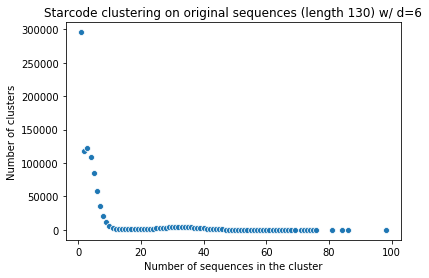

In [6]:
# Create a plot: how many clusters have how many sequences
ax = sns.scatterplot(list(clusters.keys()), list(clusters.values()))
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Number of sequences in the cluster")
ax.set_title("Starcode clustering on original sequences (length 130) w/ d=6")

#### Writing these clustered files to a class to be read in as a dataset

In [7]:
def translate(seq): 
       
    table = { 
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                  
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_', 
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W', 
    } 
    protein ="" 
    for i in range(0, len(seq), 3): 
        codon = seq[i:i + 3] 
        protein+= table[codon] 
    return protein 

In [8]:
clusters = {}
with open(starcode_output_file, 'r') as f:
    lines = f.readlines()

for l in lines:
    split = l.split()
    clusters[split[0]] = split[1]
print(str(len(clusters.keys())))

947345


In [9]:
# aptamer --> (peptide, affinity)
dataset = {}
for c in clusters.keys():
    # This is the control sequence
    if int(clusters[c]) > 90:
        continue
    else:
        mrna_seq = c[25:46]
        aptamer_seq = c[63:103]
        if len(mrna_seq) != 21:
            continue
        peptide = translate(mrna_seq)
        peptide = 'M' + peptide
        if aptamer_seq not in dataset:
            dataset[aptamer_seq] = []
        dataset[aptamer_seq].append((peptide, 1))

with open('clustered_aptamer_dataset.json', 'w') as f:
    json.dump(dataset, f)
    print("Wrote the dataset")

Wrote the dataset


### Only using sequences that have 40 nucleotides long

In [ ]:
starcode_output_file = 'starcode_aptamers_output.txt'
# size of cluster --> num clusters
clusters = {}
with open(starcode_output_file, 'r') as f:
    lines = f.readlines()

for l in lines:
    split = l.split()
    if int(split[1]) not in clusters:
        clusters[int(split[1])] = 0
    clusters[int(split[1])] += 1

In [ ]:
print(str(clusters))

In [ ]:
# Create a plot: how many clusters have how many sequences
ax = sns.scatterplot(list(clusters.keys()), list(clusters.values()))
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Number of sequences in the cluster")
ax.set_title("Starcode clustering on aptamer sequences (length 40) w/ d=3")

### Only using sequences that have 40 nucleotides long, d=2

In [ ]:
starcode_output_file = 'starcode_aptamers_d=2.txt'
# size of cluster --> num clusters
clusters = {}
with open(starcode_output_file, 'r') as f:
    lines = f.readlines()

for l in lines:
    split = l.split()
    if int(split[1]) not in clusters:
        clusters[int(split[1])] = 0
    clusters[int(split[1])] += 1

In [ ]:
print(str(clusters))

In [ ]:
# Create a plot: how many clusters have how many sequences
ax = sns.scatterplot(list(clusters.keys()), list(clusters.values()))
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Number of sequences in the cluster")
ax.set_title("Starcode clustering on aptamer sequences (length 40) w/ d=2")

In [ ]:
ax = sns.regplot(list(clusters.keys()), list(clusters.values()), fit_reg=False)
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Number of sequences in the cluster")
ax.set_title("Starcode clustering on aptamer sequences (length 40) w/ d=2")
ax.set(xscale="log")

### What is in the clusters?

In [ ]:
starcode_output_file = "starcode_aptamers_print_clusters.txt"
# size of cluster --> num clusters
clusters = {}
with open(starcode_output_file, 'r') as f:
    lines = f.readlines()

for l in lines:
    split = l.split()
    if int(split[1]) not in clusters:
        clusters[int(split[1])] = 0
    clusters[int(split[1])] += 1

In [ ]:
print(str(clusters))

In [ ]:
sorted_clusters = {k: v for k, v in sorted(clusters.items(), key=lambda item: len(item[1]))}

In [ ]:
for i in range(len(sorted_clusters.keys())):
    reverse_sorted = sorted_clusters.keys()[len(sorted_clusters.keys()) - 1 - i]
    print(str(reverse_sorted))
    print(str(len(sorted_clusters[reverse_sorted])))
    break